In [ ]:
## Gini coefficient

## Gini coefficient

# reference:
# https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy

# https://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm

In [8]:
import numpy as np
import matplotlib.pyplot as plt

bins:  [ 0. 11. 22. 33. 44. 55. 66. 77. 88. 99.]
lorenz_y:  [0.0007202786011575753, 1.4585380227769738, 5.315090797104649, 11.615434761348592, 20.419130856515405, 31.589219562657927, 44.78599389643988, 60.204505868511035, 77.77405045883073, 98.02715238512893]
pe_area:  5000.0


(array([18., 27., 26., 25., 24., 22., 28., 18., 27., 25., 33., 31., 24.,
        28., 24., 32., 24., 22., 19., 23.]),
 array([0.00180675, 0.05165473, 0.1015027 , 0.15135067, 0.20119865,
        0.25104662, 0.3008946 , 0.35074257, 0.40059055, 0.45043852,
        0.5002865 , 0.55013447, 0.59998245, 0.64983042, 0.6996784 ,
        0.74952637, 0.79937434, 0.84922232, 0.89907029, 0.94891827,
        0.99876624]),
 <a list of 20 Patch objects>)

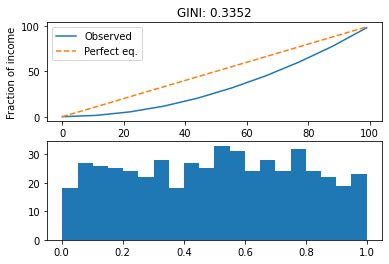

In [34]:
# Method 1: approximate the curve of Lorenzo with integral
# use numpy to estimate the area B of Lorenzo combining with x axis
# A/A+B = 2A or 1-2B

def Gini1(v):
    bins = np.linspace(0., 99., 10)
    print("bins: ", bins)
    total = float(np.sum(v))
    lorenz_y = []
    # accumulate prob to estimate lorenz y value
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        lorenz_y.append(bin_fraction)
    print("lorenz_y: ", lorenz_y)
    # perfect equality area
    pe_area = 100*100*0.5 # np.trapz(bins, x=bins)
    print("pe_area: ", pe_area)
    # lorenz area
    lorenz_area = np.trapz(lorenz_y, x=bins)      # np.trapz is to get the integral
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, lorenz_y, gini_val

v = np.random.rand(500)
bins, lorenz_y, gini_val = Gini1(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, lorenz_y, label="Observed")
plt.plot(bins, bins, '--', label="Perfect eq.")
plt.xlabel("Fraction of population")
plt.ylabel("Fraction of income")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

bins:  [ 0. 11. 22. 33. 44. 55. 66. 77. 88. 99.]
Gini coefficient: 0.32977110975562607


(array([23., 22., 27., 22., 28., 32., 29., 24., 14., 34., 22., 26., 20.,
        23., 24., 27., 20., 36., 26., 21.]),
 array([0.00287968, 0.05257706, 0.10227443, 0.15197181, 0.20166919,
        0.25136657, 0.30106395, 0.35076133, 0.40045871, 0.45015609,
        0.49985347, 0.54955084, 0.59924822, 0.6489456 , 0.69864298,
        0.74834036, 0.79803774, 0.84773512, 0.8974325 , 0.94712987,
        0.99682725]),
 <a list of 20 Patch objects>)

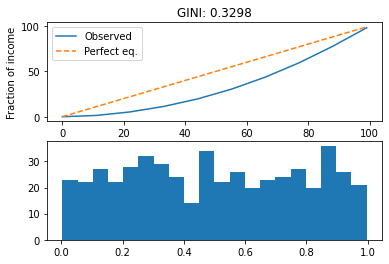

In [39]:
# Method 2: use the formula to calculate directly
# reference: https://github.com/oliviaguest/gini
# make sure it's sorted

def Gini2(arr):

    arr = arr.flatten()
    if np.amin(arr) < 0:
      # Values cannot be negative:
      arr -= np.amin(arr)

    # Values cannot be 0:
    arr += 0.0000001

    # Values must be sorted:
    arr = np.sort(arr)

    # Index per array element:
    index = np.arange(1,arr.shape[0]+1)
    # Number of array elements:
    n = arr.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * arr)) / (n * np.sum(arr)))


v = np.random.rand(500)
bins = np.linspace(0., 99., 10)
print("bins: ", bins)
total = float(np.sum(v))
lorenz_y = []
# accumulate prob to estimate lorenz y value
for b in bins:
  bin_vals = v[v <= np.percentile(v, b)]
  bin_fraction = (np.sum(bin_vals) / total) * 100.0
  lorenz_y.append(bin_fraction)

gini_val = Gini2(v)
print("Gini coefficient:", gini_val)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, lorenz_y, label="Observed")
plt.plot(bins, bins, '--', label="Perfect eq.")
plt.xlabel("Fraction of population")
plt.ylabel("Fraction of income")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)
